<a href="https://colab.research.google.com/github/LucasMello22/DeepLearningColab/blob/master/GA_to_a_SSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação e Importação de Bibliotecas

In [ ]:
# Instalar bibliotecas necessárias
!pip install deap opencv-python scikit-image

# Importar as bibliotecas
import cv2
import os
import random
import numpy as np
from deap import base, creator, tools, algorithms
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.5 MB/s eta 0:00:00


In [62]:
# Conectando ao drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Convertendo as imagens .jfif em .jpg

In [ ]:
from PIL import Image
import os

# Função para converter uma imagem .jfif em .jpg
def convert_jfif_to_jpg(input_path, output_path):
    with Image.open(input_path) as img:
        img = img.convert("RGB")  # Certifique-se de converter para RGB
        img.save(output_path, "JPEG")  # Salve como .jpg

# Caminho para a pasta onde as imagens .jfif estão
input_folder = '/content/drive/MyDrive/Poject/Sintetico/0'  # Ajuste este caminho para sua pasta de imagens
output_folder = '/content/drive/MyDrive/Poject/Sintetico/new'  # Pasta para salvar as imagens .jpg

# Cria a pasta de saída, se não existir
os.makedirs(output_folder, exist_ok=True)

# Loop para percorrer todos os arquivos .jfif da pasta e convertê-los
for filename in os.listdir(input_folder):
    if filename.endswith(".jfif"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.jpg")
        convert_jfif_to_jpg(input_path, output_path)
        print(f"Convertido: {filename} -> {os.path.basename(output_path)}")

print("Conversão concluída!")


Convertido: Gemini_Generated_Image_gqrkmzgqrkmzgqrk.jfif -> Gemini_Generated_Image_gqrkmzgqrkmzgqrk.jpg
Convertido: Gemini_Generated_Image_f1lvrif1lvrif1lv.jfif -> Gemini_Generated_Image_f1lvrif1lvrif1lv.jpg
Convertido: Gemini_Generated_Image_fcc05bfcc05bfcc0.jfif -> Gemini_Generated_Image_fcc05bfcc05bfcc0.jpg
Convertido: Gemini_Generated_Image_c26qsec26qsec26q.jfif -> Gemini_Generated_Image_c26qsec26qsec26q.jpg
Convertido: Gemini_Generated_Image_rv90dhrv90dhrv90.jfif -> Gemini_Generated_Image_rv90dhrv90dhrv90.jpg
Convertido: Gemini_Generated_Image_sna5jbsna5jbsna5.jfif -> Gemini_Generated_Image_sna5jbsna5jbsna5.jpg
Convertido: Gemini_Generated_Image_sqxsyysqxsyysqxs.jfif -> Gemini_Generated_Image_sqxsyysqxsyysqxs.jpg
Convertido: Gemini_Generated_Image_qclh8pqclh8pqclh.jfif -> Gemini_Generated_Image_qclh8pqclh8pqclh.jpg
Convertido: Gemini_Generated_Image_asmyo7asmyo7asmy.jfif -> Gemini_Generated_Image_asmyo7asmyo7asmy.jpg
Convertido: Gemini_Generated_Image_aaty8kaaty8kaaty.jfif -> Gemi

# Remover fundo das imagens

In [66]:
!pip install rembg

from rembg import remove

input_path = '/content/drive/MyDrive/Poject/Real/0/DSC_0001_11zon - Copia (10) - Copia - Copia.jpg'
output_path = '/content/drive/MyDrive/Poject/Real/output.jpg'

with open(input_path, 'rb') as i:
    with open(output_path, 'wb') as o:
        input = i.read()
        output = remove(input)
        o.write(output)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.0 MB/s eta 0:00:00


100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 53.5GB/s]


# Funções para Leitura de Imagens

Leitura e Processamento


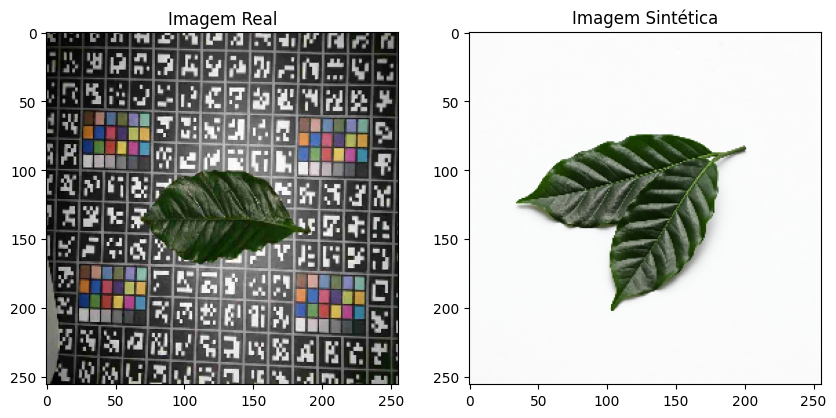

In [ ]:
def load_images_from_folder(folder_path, size=(256, 256)):  # Define um tamanho padrão
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Somente arquivos de imagem
            img = cv2.imread(file_path)
            if img is not None:
                img_resized = cv2.resize(img, size)  # Redimensiona a imagem
                images.append(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))  # Converte para RGB
            else:
                print(f"Não foi possível carregar: {file_path}")
        else:
            print(f"Arquivo ignorado: {file_path}")
    return images
# Exemplo de leitura das imagens
real_images = load_images_from_folder('/content/drive/MyDrive/Poject/Real/0')
synthetic_images = load_images_from_folder('/content/drive/MyDrive/Poject/Sintetico/new')

# Exibir algumas imagens
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(real_images[0])
plt.title("Imagem Real")
plt.subplot(1, 2, 2)
plt.imshow(synthetic_images[0])
plt.title("Imagem Sintética")
plt.show()


# Vizualizar os valores das funções de similaridade

In [68]:
from skimage.metrics import structural_similarity as ssim

# Função de aptidão ajustada para especificar um win_size menor
def ssim_fitness(image1, image2):
    return ssim(image1, image2, win_size=3, channel_axis=2)  # Definindo win_size como 3, ajustando para multichannel

# Exemplo de uso
for real_img, synthetic_img in zip(real_images, synthetic_images):
    fitness_value = ssim_fitness(real_img, synthetic_img)
    print(f"Similaridade SSIM {i} :   {fitness_value}")


Similaridade SSIM 19 :   0.09537444213743963
Similaridade SSIM 19 :   0.09651564384129824
Similaridade SSIM 19 :   0.09464208521580843
Similaridade SSIM 19 :   0.09478563081021237
Similaridade SSIM 19 :   0.09691113981426837
Similaridade SSIM 19 :   0.10078325766704611
Similaridade SSIM 19 :   0.09851393282988859
Similaridade SSIM 19 :   0.09538335647086225
Similaridade SSIM 19 :   0.08677360271993574
Similaridade SSIM 19 :   0.0914189709341538
Similaridade SSIM 19 :   0.0939024964194256
Similaridade SSIM 19 :   0.1080609595391297
Similaridade SSIM 19 :   0.10117074957634441
Similaridade SSIM 19 :   0.09603655996154492
Similaridade SSIM 19 :   0.09401299355948627
Similaridade SSIM 19 :   0.11411272180846628
Similaridade SSIM 19 :   0.10730087995738656
Similaridade SSIM 19 :   0.1094949303054182
Similaridade SSIM 19 :   0.09414756013086617
Similaridade SSIM 19 :   0.10054447773838095
Similaridade SSIM 19 :   0.0874609946041987
Similaridade SSIM 19 :   0.09978869622070828
Similaridade SS

# Definição do Fitness

In [ ]:
def evaluate_image_fitness(synthetic_image, real_images):
    fitness_scores = []
    for real_image in real_images:
        score = ssim(real_image, synthetic_image, multichannel=True)
        fitness_scores.append(score)
    return max(fitness_scores)  # Retorna a maior similaridade com qualquer imagem real


# Configurando GA

In [ ]:
# Configuração da classe de aptidão e indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

# Função para criar a população inicial de imagens sintéticas
def create_individual():
    return creator.Individual(random.choice(synthetic_images))

# Função de avaliação do AG
def evaluate(individual):
    return evaluate_image_fitness(individual, real_images),

# Configurar toolbox do DEAP
toolbox = base.Toolbox()
toolbox.register("individual", create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


# Executando GA

In [ ]:
import random
import cv2
from deap import base, creator, tools
from skimage.metrics import structural_similarity as ssim

# Função de aptidão usando SSIM com win_size adequado
def ssim_fitness(image1, image2):
    return ssim(image1, image2, win_size=3, channel_axis=2)  # Ajuste o win_size se necessário

# Função para avaliar a aptidão de um indivíduo
def evaluate_individual(individual):
    # A aptidão será baseada na comparação da imagem sintética (indivíduo) com uma imagem real
    real_image = random.choice(real_images)  # Escolhe uma imagem real aleatoriamente
    synthetic_image = individual[0]  # O indivíduo contém a imagem sintética
    fitness_value = ssim_fitness(real_image, synthetic_image)
    return (fitness_value,)

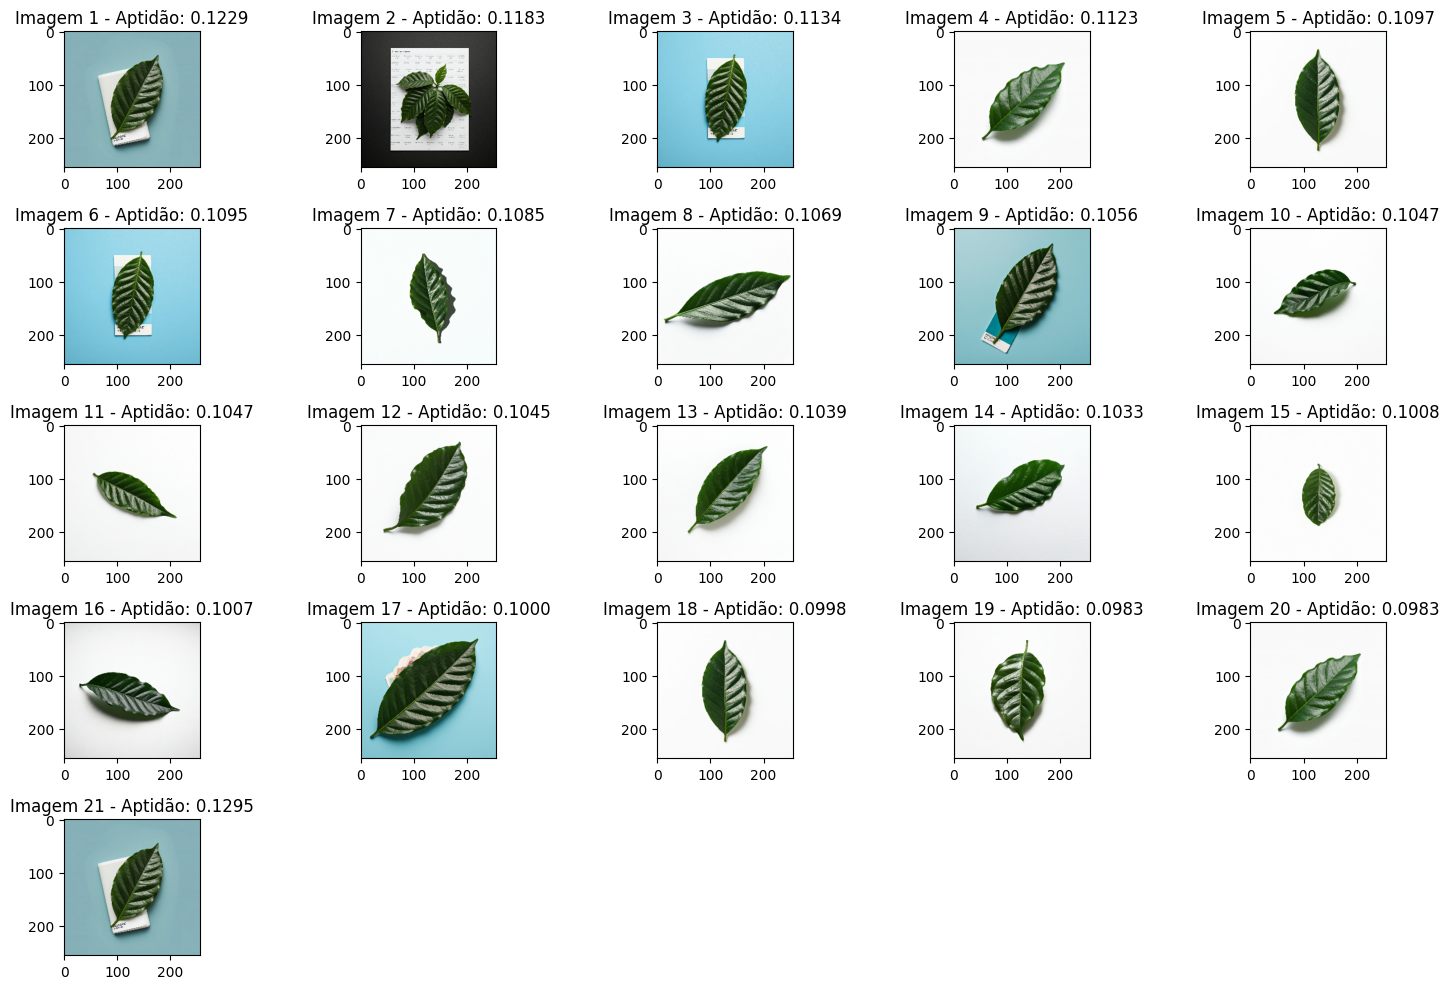

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from deap import tools

# Parâmetros do AG
population_size = 50
num_generations = 50
target_best_images = 20
# Criar a população inicial
population = toolbox.population(n=population_size)

# Lista para armazenar as melhores imagens e suas aptidões
best_images = []
best_fitnesses = set()  # Usar um conjunto para armazenar as aptidões únicas

# Executar o Algoritmo Genético
for gen in range(num_generations):


    # Avaliar a aptidão de cada indivíduo
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Selecionar os melhores indivíduos
    selected_individuals = toolbox.select(population, len(population))

    # Atualizar a população com os indivíduos selecionados
    population[:] = list(map(toolbox.clone, selected_individuals))

    # Obter os melhores indivíduos da geração
    top_individuals = tools.selBest(population, len(population))

    for individual in top_individuals:
        # Verifica se a aptidão já foi adicionada
        if individual.fitness.values[0] not in best_fitnesses:
            best_fitnesses.add(individual.fitness.values[0])  # Adiciona a aptidão ao conjunto
            best_images.append((individual[0], individual.fitness.values[0]))  # Adiciona a melhor imagem e sua aptidão


        # Para garantir que não ultrapasse o número desejado de imagens
        if len(best_images) >= target_best_images:
            break  # Para sair do loop se já atingiu o número desejado

# Se não houver imagens suficientes, continue a adicionar até atingir 20
if len(best_images) < target_best_images:
    print(f"Ainda faltam {target_best_images - len(best_images)} imagens.")
    for gen in range(num_generations):
        # Avaliar a aptidão de cada indivíduo
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        # Selecionar os melhores indivíduos
        selected_individuals = toolbox.select(population, len(population))

        # Atualizar a população com os indivíduos selecionados
        population[:] = list(map(toolbox.clone, selected_individuals))

        # Obter os melhores indivíduos da geração
        top_individuals = tools.selBest(population, len(population))

        for individual in top_individuals:
            # Verifica se a aptidão já foi adicionada
            if individual.fitness.values[0] not in best_fitnesses:
                best_fitnesses.add(individual.fitness.values[0])  # Adiciona a aptidão ao conjunto
                best_images.append((individual[0], individual.fitness.values[0]))  # Adiciona a melhor imagem e sua aptidão


            # Para garantir que não ultrapasse o número desejado de imagens
            if len(best_images) >= target_best_images:
                break  # Para sair do loop se já atingiu o número desejado

# Exibir as melhores imagens encontradas
plt.figure(figsize=(15, 10))
for i, (img, fitness) in enumerate(best_images):
    plt.subplot(5, len(best_images) // 5 + 1, i + 1)  # Ajusta a grade dependendo do número de gerações
    plt.imshow(img)
    plt.title(f"Imagem {i + 1} - Aptidão: {fitness:.4f}")  # Usa a aptidão armazenada


plt.tight_layout()
plt.show()
